# HomeWork 9

**DeadLine : 23:59 19 Azar 1401**

**Total points : 100pts**


Import some prerequisites:

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import imutils

Run this cell for plotting.

In [6]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 3

**Point : 35 pts**

Here is for your helper functions(optional).

Implement this function to get the input image and return the skeleton of the input image.

In [ ]:
def get_skeleton(image):
    """
    Finds the skeleton of the input image.
    Parameters:
        image (numpy.ndarray): The input image.
    Returns:
        numpy.ndarray: The skeleton image.  
        numpy.ndarray: The parameters required for reconstructing image
    """
    res = image.copy()
    params = []
    #Write your code here
    k = 0
    _, image = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY_INV)
    res = np.zeros(image.shape, np.uint8)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
    while cv2.countNonZero(image)!=0:
        erosion = cv2.erode(image, element)
        open = cv2.dilate(erosion, element)
        subtract = cv2.subtract(image, open)
        res = cv2.bitwise_or(res, subtract)
        image = erosion
        params.append((k, subtract))
        k += 1
    return res, params

Test your implementation (don't change this cell).

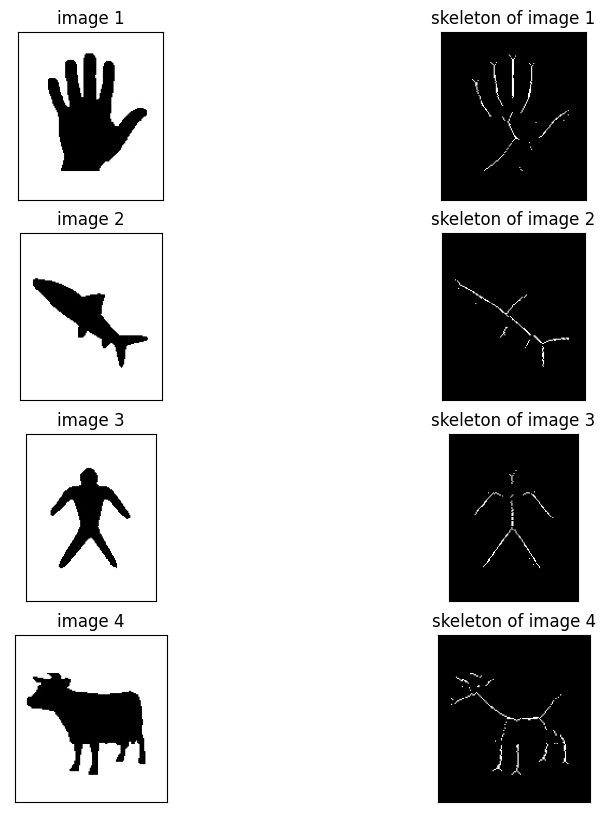

In [ ]:
path = r'E:\University\Term7\FCV\Homeworks\HW9\Images'

image_list = []

image1 = cv2.imread(os.path.join(path, 'img1.jpg'), cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_skeleton, params1 = get_skeleton(image1)
image_list.append([image1_skeleton, 'skeleton of image 1','img'])

image2 = cv2.imread(os.path.join(path, 'img2.jpg'), cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_skeleton, params2 = get_skeleton(image2)
image_list.append([image2_skeleton, 'skeleton of image 2','img'])

image3 = cv2.imread(os.path.join(path, 'img3.jpg'), cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_skeleton, params3 = get_skeleton(image3)
image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])

image4 = cv2.imread(os.path.join(path, 'img4.jpg'), cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_skeleton, params4 = get_skeleton(image4)
image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q3-a')

Implement this function to get the input image as skeleton and return the reconstruction of the skeleton.

In [ ]:
def recons_skeleton(image, params):
    """
    Finds the original image from the skeleton.
    
    Parameters:
        image (numpy.ndarray): The skeleton of image.
        params (numpy.ndarray): The parameters required for reconstructing image
    
    Returns:
        numpy.ndarray: The original image.  
    """
    
    res = image.copy()
    
    #Write your code here
    element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    for k, param in params:
        dilate = cv2.dilate(param ,element, iterations=k)
        res = cv2.bitwise_or(res, dilate)
        
    res = cv2.bitwise_not(res)    
    return res

Test your implementation (don't change this cell).

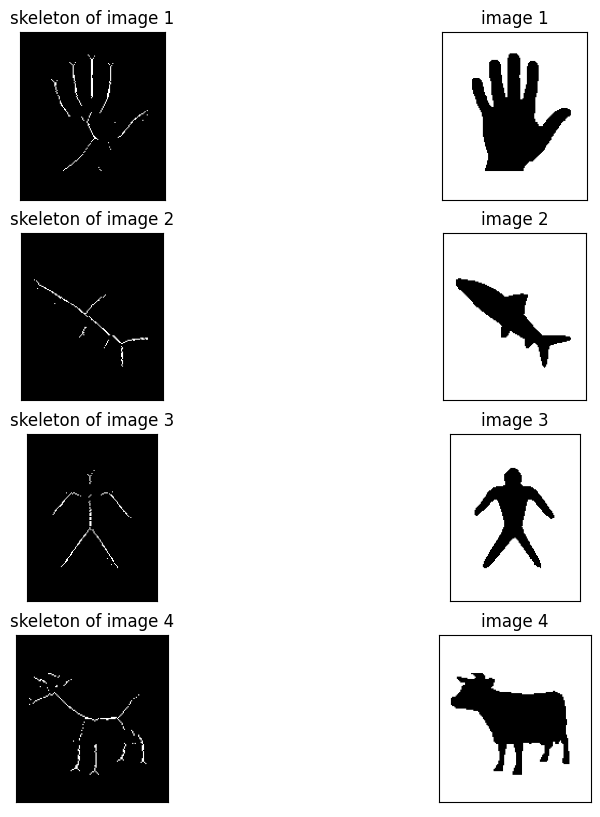

In [ ]:
image_list = []

image_list.append([image1_skeleton, 'skeleton of image 1', 'img'])
image_list.append([recons_skeleton(image1_skeleton, params1), 'image 1','img'])

image_list.append([image2_skeleton, 'skeleton of image 2', 'img'])
image_list.append([recons_skeleton(image2_skeleton, params2), 'image 2','img'])

image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])
image_list.append([recons_skeleton(image3_skeleton, params3), 'image 3', 'img'])

image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])
image_list.append([recons_skeleton(image4_skeleton, params4), 'image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q3-b')

# PART 4

**Point : 30 pts**

Here is for your helper functions(optional).

Implement this function to detect shapes and number of cars in an input image.

In [88]:
def detect_car_num(image):
    '''
    Detects shapes and number of cars in the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
        integer: number of cars
    '''
    result = image.copy()
    cars_num = 0
    
    #Write your code here
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    tresh = cv2.threshold(blur, 120, 255, cv2.THRESH_BINARY)[1]

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
    open = cv2.morphologyEx(tresh, cv2.MORPH_OPEN, kernel)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    open = cv2.morphologyEx(open, cv2.MORPH_OPEN, kernel)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15,15))
    close = cv2.morphologyEx(open, cv2.MORPH_CLOSE, kernel)
    
    cnts = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    for c in cnts:
      cars_num += 1
      cv2.drawContours(result, [c], -1, (0, 255, 0), 2)
    return result, cars_num

Test your implementation (don't change this cell).

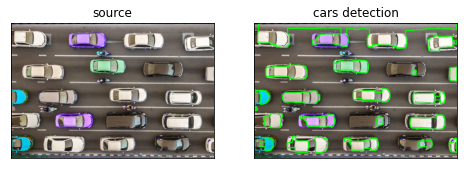

detected cars number:  21


In [89]:
image_list = []
image = cv2.imread('img5.jpg', cv2.IMREAD_COLOR)
image_list.append([image, 'source', 'img'])
image_list.append([detect_car_num(image)[0], 'cars detection', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'Q4-a')
print('detected cars number: ',detect_car_num(image)[1])

Implement this function to detect shapes and number of flowers in an input image.

In [177]:
def detect_flower_num(image):
    '''
    Detects shapes and number of flowers in the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
        integer: number of flowers
    '''
    
    result = image.copy()
    flowers_num = 0

    #Write your code here
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.blur(gray, (3, 3))
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
    erosion = cv2.erode(blur, kernel)
    circles = cv2.HoughCircles(erosion, cv2.HOUGH_GRADIENT, 1, 20, param1 = 40, param2 = 30, minRadius = 1, maxRadius = 45)
    circles = np.uint16(np.around(circles))
    
    for circle in circles[0, :]:
      flowers_num += 1
      x, y, r = circle[0], circle[1], circle[2]
      cv2.circle(result, (x, y), r, (0, 255, 0), 3)
      
    return result, flowers_num

Test your implementation (don't change this cell).

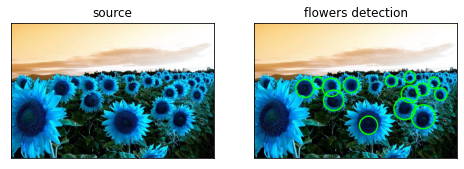

detected flowers number:  14


In [178]:
image_list = []
image = cv2.imread('img6.jpg', cv2.IMREAD_COLOR)
image_list.append([image, 'source', 'img'])
image_list.append([detect_flower_num(image)[0], 'flowers detection', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'Q4-b')
print('detected flowers number: ',detect_flower_num(image)[1])

End!!!